In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rc
import matplotlib.font_manager
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
from matplotlib import rc
from scipy.optimize import least_squares
from scipy.linalg import svd
import pandas as pd
from collections import OrderedDict



plt.style.use(u'classic')


rc('text', usetex=True)
rc('font', family='serif')


prop = matplotlib.font_manager.FontProperties(size=15)

# Extracting expressions for function $\eta(J, f_n^{cl}/P)$

This notebook describes the details of deriving parameters for the empirical functions illustrated in [*Analog of discontinuous shear thickening flows under confining pressure*](https://journals.aps.org/prfluids/abstract/10.1103/PhysRevFluids.2.081301). In this paper, we studied the effect of friction contacts on flow behavior of dense suspensions. Being sheared under controlled confining pressure $P$, the viscosities can be described as functions of packing fraction: $\eta \approx k(\phi_c-\phi)^{-n}$, where $k$, $\phi_c$ and $n$ are three unknow parameters. We assumed that all these parameters are dependent on friction contacts and we defined a parameter called fraction of friction contacts, $\chi_f$. The main contents of this notebook are as follows:
* get values of $k$, $\phi_c$ and $n$ corresponding to different $\chi_f$ by fitting simulation data with fixed $\chi_f$ into $\eta \approx k(\phi_c-\phi)^{-n}$;
* get expressions of $k(\chi_f)$, $\phi_c(\chi_f)$, $n(\chi_f)$;
* from simulation data with evolved $\chi_f$, get expressions of $\chi_f(J)$ for different $f_n^{cl}/P$;
* find relations between parameters in $\chi_f(J)$ and $f_n^{cl}/P$;
* similarly, get expressions of $\phi(J, f_n^{cl}/P)$;
* combine all the functions above, get $\eta(J, f_n^{cl}/P)$.

### Plots of simulation data and corresponding fittings with fixed $\chi_f$

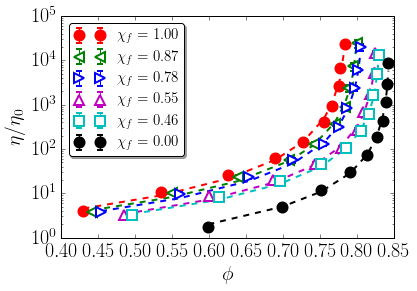

In [2]:
plt.yscale('log')

def fitfunc(param,x):
    return param[0]*np.abs(param[1]-x)**(-param[2])
def errfunc(param,x,y,yerr):
    return (y-fitfunc(param,x))/yerr
def error_analysis(res):
    cost = 2 * res.cost
    s_sq = cost / (res.fun.size - res.x.size)
    _, s, VT = svd(res.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT) * s_sq
    return np.sqrt(np.diag(pcov)), s_sq


a = np.loadtxt('data/frac1.00')
b = np.loadtxt('data/frac0.87')
c = np.loadtxt('data/frac0.78')
d = np.loadtxt('data/frac0.50')
e = np.loadtxt('data/frac0.45')
f = np.loadtxt('data/frac0.00')

args0 = [a[:,1],a[:,11],a[:,12]]
plt.errorbar(args0[0],args0[1],ls='',marker='o', mfc='r',ms=10, mew=2, yerr=args0[2], mec='r', ecolor='r', 
             label=r'$\chi_f=1.00$')
res0 = least_squares(errfunc,x0=[0.06,0.81,2.],args=args0)
plt.plot(args0[0],fitfunc(res0['x'],args0[0]),ls='--',lw=2,color='r')

args1 = [b[:,1],b[:,11],b[:,12]]
plt.errorbar(args1[0],args1[1],ls='',marker='<', mfc='w',ms=10, mew=2, yerr=args1[2], mec='g', ecolor='g', 
             label=r'$\chi_f=0.87$')
res1 = least_squares(errfunc,x0=[0.06,0.81,2.],args=args1)
plt.plot(args1[0],fitfunc(res1['x'],args1[0]),ls='--',lw=2,color='g')

args2 = [c[:,1],c[:,11],c[:,12]]
plt.errorbar(args2[0],args2[1],ls='',marker='>', mfc='w',ms=10, mew=2, yerr=args2[2], mec='b', ecolor='b', 
             label=r'$\chi_f=0.78$')
res2 = least_squares(errfunc,x0=[0.06,0.82,2.],args=args2)
plt.plot(args2[0],fitfunc(res2['x'],args2[0]),ls='--',lw=2,color='b')

args3 = [d[:,1],d[:,11],d[:,12]]
plt.errorbar(args3[0],args3[1],ls='',marker='^', mfc='w',ms=10, mew=2, yerr=args3[2], mec='m', ecolor='m', 
             label=r'$\chi_f=0.55$')
res3 = least_squares(errfunc,x0=[0.06,0.84,2.],args=args3)
plt.plot(args3[0],fitfunc(res3['x'],args3[0]),ls='--',lw=2,color='m')

args4 = [e[:,1],e[:,11],e[:,12]]
plt.errorbar(args4[0],args4[1],ls='',marker='s', mfc='w',ms=10, mew=2, yerr=args4[2], mec='c', ecolor='c', 
             label=r'$\chi_f=0.46$')
res4 = least_squares(errfunc,x0=[0.06,0.84,2.],args=args4)
plt.plot(args4[0],fitfunc(res4['x'],args4[0]),ls='--',lw=2,color='c')

args5 = [f[:,1],f[:,11],f[:,12]]
plt.errorbar(args5[0],args5[1],ls='',marker='o', mfc='k',ms=10, mew=2, yerr=args5[2], mec='k', ecolor='k', 
             label=r'$\chi_f=0.00$')
res5 = least_squares(errfunc,x0=[0.06,0.85,2.],args=args5)
plt.plot(args5[0],fitfunc(res5['x'],args5[0]),ls='--',lw=2,color='k')



plt.figsize=(3.375,3.375) 
plt.dpi=1200
plt.subplots_adjust(left=0.19)
plt.subplots_adjust(right=0.96)
plt.subplots_adjust(bottom=0.18)
plt.subplots_adjust(top=0.95)
plt.xlim((0.40,0.85))
plt.ylim((1,100000))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('$\phi$',fontsize=20)
plt.ylabel('$\eta/\eta_0$',fontsize=20)
plt.legend(bbox_to_anchor=(0, 1),loc=2, fancybox=True, shadow=True, prop=prop)
plt.show()


In [3]:
data_dict = [{r'$\chi_f$':'1.00',r'$k$': res0.x[0],r'$\phi_c$': res0.x[1],r'$n$': res0.x[2],
                          r'$err(k)$':error_analysis(res0)[0][0],r'$err(\phi_c)$':error_analysis(res0)[0][1], r'$err(n)$':error_analysis(res0)[0][2]},
            {r'$\chi_f$':'0.87',r'$k$': res1.x[0],r'$\phi_c$': res1.x[1],r'$n$': res1.x[2],
                          r'$err(k)$':error_analysis(res1)[0][0],r'$err(\phi_c)$':error_analysis(res1)[0][1], r'$err(n)$':error_analysis(res1)[0][2]},
            {r'$\chi_f$':'0.78',r'$k$': res2.x[0],r'$\phi_c$': res2.x[1],r'$n$': res2.x[2],
                          r'$err(k)$':error_analysis(res2)[0][0],r'$err(\phi_c)$':error_analysis(res2)[0][1], r'$err(n)$':error_analysis(res2)[0][2]},
            {r'$\chi_f$':'0.55',r'$k$': res3.x[0],r'$\phi_c$': res3.x[1],r'$n$': res3.x[2],
                          r'$err(k)$':error_analysis(res3)[0][0],r'$err(\phi_c)$':error_analysis(res3)[0][1], r'$err(n)$':error_analysis(res3)[0][2]},
            {r'$\chi_f$':'0.46',r'$k$': res4.x[0],r'$\phi_c$': res4.x[1],r'$n$': res4.x[2],
                          r'$err(k)$':error_analysis(res4)[0][0],r'$err(\phi_c)$':error_analysis(res4)[0][1], r'$err(n)$':error_analysis(res4)[0][2]},
            {r'$\chi_f$':'0.00',r'$k$': res5.x[0],r'$\phi_c$': res5.x[1],r'$n$': res5.x[2],
                          r'$err(k)$':error_analysis(res5)[0][0],r'$err(\phi_c)$':error_analysis(res5)[0][1], r'$err(n)$':error_analysis(res5)[0][2]}]
fitdata = pd.DataFrame(data_dict)
fitdata = fitdata[[r'$\chi_f$', r'$k$', r'$err(k)$', r'$\phi_c$', r'$err(\phi_c)$', r'$n$', r'$err(n)$']]


fitdata


,$\chi_f$,$k$,$err(k)$,$\phi_c$,$err(\phi_c)$,$n$,$err(n)$
0,1.00,0.604819,0.094771,0.788776,0.001062,1.966836,0.076628
1,0.87,0.593799,0.080311,0.803708,0.001497,1.916707,0.076256
2,0.78,0.559148,0.049596,0.809477,0.000938,1.892947,0.056585
3,0.55,0.477832,0.057400,0.829765,0.001161,1.845960,0.068589
4,0.46,0.515246,0.037502,0.832733,0.000374,1.736306,0.034861
5,0.00,0.170400,0.025680,0.845241,0.000827,1.756980,0.067014


Now we have sets of parameters corresponding to different $\chi_f$. Then we try to find functions that relate $\chi_f$ to each parameter. 

In [4]:
def fitk(param,x):
    return 0.604819*x**param[0]+0.170400*(1-x**param[0])
def errk(param,x,y,yerr):
    return (y-fitk(param,x))/yerr
def fitphic(param,x):
    return 0.788776*x**param[0]+0.845241*(1-x**param[0])
def errphic(param,x,y,yerr):
    return (y-fitphic(param,x))/yerr
def fitn(param,x):
    return 1.966836*x**param[0]+1.756980*(1-x**param[0])
def errn(param,x,y,yerr):
    return (y-fitn(param,x))/yerr



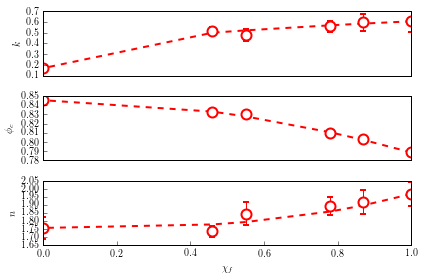

In [5]:
f, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, sharey=False)
x = fitdata[r'$\chi_f$'].values.astype(float)
argsk = [x,fitdata[r'$k$'].values,fitdata[r'$err(k)$'].values]
argsphic = [x,fitdata[r'$\phi_c$'].values,fitdata[r'$err(\phi_c)$'].values]
argsn = [x,fitdata[r'$n$'].values,fitdata[r'$err(n)$'].values]

ax1.errorbar(argsk[0],argsk[1],yerr=argsk[2], ls='',marker='o',mfc='w',ms=10, mew=2,mec='r', ecolor='r')
ax2.errorbar(argsphic[0],argsphic[1],yerr=argsphic[2], ls='',marker='o',mfc='w',ms=10, mew=2,mec='r', ecolor='r')
ax3.errorbar(argsn[0],argsn[1],yerr=argsn[2], ls='',marker='o',mfc='w',ms=10, mew=2,mec='r', ecolor='r')

plt.xlabel(r'$\chi_f$')
ax1.set_ylabel(r'$k$'); ax2.set_ylabel(r'$\phi_c$'); ax3.set_ylabel(r'$n$')
ax1.yaxis.set_ticks_position('left');ax2.yaxis.set_ticks_position('left');ax3.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('none');ax2.xaxis.set_ticks_position('none');ax3.xaxis.set_ticks_position('bottom');

resk = least_squares(errk,x0=[2.],args=argsk)
ax1.plot(x,fitk(resk['x'],x),lw=2,ls='--',color='r')

resphic = least_squares(errphic,x0=[2.],args=argsphic)
ax2.plot(x,fitphic(resphic['x'],x),lw=2,ls='--',color='r')

resn = least_squares(errn,x0=[2.],args=argsn)
ax3.plot(x,fitn(resn['x'],x),lw=2,ls='--',color='r')


f.tight_layout()

We get expressions of $k(\chi_f)$, $\phi_c(\chi_f)$, $n(\chi_f)$.

In [6]:
def getk(x):
    return 0.604819*x**resk.x+0.170400*(1-x**resk.x)
def getphic(x):
    return 0.788776*x**resphic.x+0.845241*(1-x**resphic.x)
def getn(x):
    return 1.966836*x**resn.x+1.756980*(1-x**resn.x)

From above, we show that all three parameters can be expressed as combination functions of $\chi_f$ with different powers. To figure out how $\chi_f$ varies with different shear conditions, we need consider simulations where $\chi_f$ evolves dynamically denpending on confining pressure and normal contact force. We plot $\chi_f(J)$ and fit it to function $\chi_f=k_0+(1-k_0)\frac{J^{k_1}}{{k_2}+J^{k_1}}$.  

### Plots of simulation data and corresponding fittings with dynamic $\chi_f$

In [7]:
a = np.loadtxt('data/frictional')
b = np.loadtxt('data/fncl0.1')
c = np.loadtxt('data/fncl0.3')
d = np.loadtxt('data/fncl1.0')
e = np.loadtxt('data/fncl3.0')
f = np.loadtxt('data/fncl10.0')
g = np.loadtxt('data/frictionless')


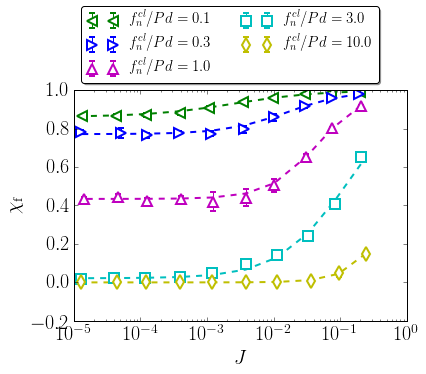

In [8]:

plt.xscale('log')


def fitchi(param,x):
    return (1-param[0])*x**param[1]/(param[2]+x**param[1])+param[0]
def errchi(param,x,y,yerr):
    if  np.count_nonzero(yerr) == np.size(yerr):
        return (y-fitchi(param,x))/yerr
    else:
        return y-fitchi(param,x)

args_chi1 = [-b[:,0],b[:,7],b[:,8]]
plt.errorbar(args_chi1[0],args_chi1[1],ls='',marker='<', mfc='w',ms=10, mew=2, yerr=args_chi1[2], mec='g', ecolor='g', 
             label=r'$f_n^{cl}/Pd=0.1$')
res_chi1 = least_squares(errchi,x0=[0.8,0.7,0.],args=args_chi1)
plt.plot(args_chi1[0],fitchi(res_chi1['x'],args_chi1[0]),ls='--',lw=2,color='g')

args_chi2 = [-c[:,0],c[:,7],c[:,8]]
plt.errorbar(args_chi2[0],args_chi2[1],ls='',marker='>', mfc='w',ms=10, mew=2, yerr=args_chi2[2], mec='b', ecolor='b', 
             label=r'$f_n^{cl}/Pd=0.3$')
res_chi2 = least_squares(errchi,x0=[0.7,1.,0.],args=args_chi2)
plt.plot(args_chi2[0],fitchi(res_chi2['x'],args_chi2[0]),ls='--',lw=2,color='b')

args_chi3 = [-d[:,0],d[:,7],d[:,8]]
plt.errorbar(args_chi3[0],args_chi3[1],ls='',marker='^', mfc='w',ms=10, mew=2, yerr=args_chi3[2], mec='m', ecolor='m', 
             label=r'$f_n^{cl}/Pd=1.0$')
res_chi3 = least_squares(errchi,x0=[0.4,1.,0.],args=args_chi3)
plt.plot(args_chi3[0],fitchi(res_chi3['x'],args_chi3[0]),ls='--',lw=2,color='m')

args_chi4 = [-e[:,0],e[:,7],e[:,8]]
plt.errorbar(args_chi4[0],args_chi4[1],ls='',marker='s', mfc='w',ms=10, mew=2, yerr=args_chi4[2], mec='c', ecolor='c', 
             label=r'$f_n^{cl}/Pd=3.0$')
res_chi4 = least_squares(errchi,x0=[0.,1.2,0.],args=args_chi4)
plt.plot(args_chi4[0],fitchi(res_chi4['x'],args_chi4[0]),ls='--',lw=2,color='c')

args_chi5 = [-f[:,0],f[:,7],f[:,8]]
plt.errorbar(args_chi5[0],args_chi5[1],ls='',marker='d', mfc='w',ms=10, mew=2, yerr=args_chi5[2], mec='y', ecolor='y', 
             label=r'$f_n^{cl}/Pd=10.0$')
res_chi5 = least_squares(errchi,x0=[0.,1.2,1.],args=args_chi5)
plt.plot(args_chi5[0],fitchi(res_chi5['x'],args_chi5[0]),ls='--',lw=2,color='y')


plt.subplots_adjust(left=0.19)
plt.subplots_adjust(right=0.96)
plt.subplots_adjust(bottom=0.18)
plt.subplots_adjust(top=0.98)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.legend(bbox_to_anchor=(0, 1),loc=3, ncol=2, fancybox=True, shadow=True, prop=prop)
plt.xlabel('$J$',fontsize=20)
plt.ylabel('$\chi_\mathrm{f}$',fontsize=20)
plt.show()




In [9]:
chi_dict = [{r'$f_n^{cl}/P$':'0.1',r'$k_0$': res_chi1.x[0],r'$k_1$': res_chi1.x[1],r'$k_2$': res_chi1.x[2],
                          r'$err(k_0)$':error_analysis(res_chi1)[0][0],r'$err(k_1)$':error_analysis(res_chi1)[0][1], 
                          r'$err(k_2)$':error_analysis(res_chi1)[0][2]},
            {r'$f_n^{cl}/P$':'0.3',r'$k_0$': res_chi2.x[0],r'$k_1$': res_chi2.x[1],r'$k_2$': res_chi2.x[2],
                          r'$err(k_0)$':error_analysis(res_chi2)[0][0],r'$err(k_1)$':error_analysis(res_chi2)[0][1], 
                          r'$err(k_2)$':error_analysis(res_chi2)[0][2]},
            {r'$f_n^{cl}/P$':'1.0',r'$k_0$': res_chi3.x[0],r'$k_1$': res_chi3.x[1],r'$k_2$': res_chi3.x[2],
                          r'$err(k_0)$':error_analysis(res_chi3)[0][0],r'$err(k_1)$':error_analysis(res_chi3)[0][1], 
                          r'$err(k_2)$':error_analysis(res_chi3)[0][2]},
            {r'$f_n^{cl}/P$':'3.0',r'$k_0$': res_chi4.x[0],r'$k_1$': res_chi4.x[1],r'$k_2$': res_chi4.x[2],
                          r'$err(k_0)$':error_analysis(res_chi4)[0][0],r'$err(k_1)$':error_analysis(res_chi4)[0][1], 
                          r'$err(k_2)$':error_analysis(res_chi4)[0][2]},
            {r'$f_n^{cl}/P$':'10.0',r'$k_0$': res_chi5.x[0],r'$k_1$': res_chi5.x[1],r'$k_2$': res_chi5.x[2],
                          r'$err(k_0)$':error_analysis(res_chi5)[0][0],r'$err(k_1)$':error_analysis(res_chi5)[0][1], 
                          r'$err(k_2)$':error_analysis(res_chi5)[0][2]}]

fitchi = pd.DataFrame(chi_dict)
fitchi = fitchi[[r'$f_n^{cl}/P$', r'$k_0$', r'$err(k_0)$', r'$k_1$', r'$err(k_1)$', r'$k_2$', r'$err(k_2)$']]


fitchi




,$f_n^{cl}/P$,$k_0$,$err(k_0)$,$k_1$,$err(k_1)$,$k_2$,$err(k_2)$
0,0.1,0.861415,0.003223,0.691536,0.020212,0.016254,0.000916
1,0.3,0.771544,0.005444,0.949609,0.047080,0.019771,0.002053
2,1.0,0.434101,0.003563,1.189930,0.027824,0.025348,0.001566
3,3.0,0.020829,0.003407,0.868817,0.080712,0.163682,0.031213
4,10.0,-0.000653,0.000836,1.400878,0.053257,0.787632,0.062642


In addition, $\chi_f$ should also be controlled by $f_n^{cl}/P$. It is resonable to assume that $k_0$, $k_1$ and $k_2$ are all functions of $f_n^{cl}/P$.

In [10]:
def fitk0(param,x):
    return np.exp(param[0]*x)
def errk0(param,x,y,yerr):
    return (y-fitk0(param,x))/yerr

def fitk1(param,x):
    return param[0]*x**param[1]+param[2]
def errk1(param,x,y,yerr):
    return (y-fitk1(param,x))/yerr

def fitk2(param,x):
    return param[0]*x**param[1]
def errk2(param,x,y,yerr):
    return (y-fitk2(param,x))



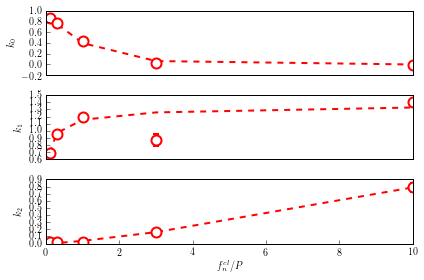

In [11]:
f, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, sharey=False)
x = fitchi[r'$f_n^{cl}/P$'].values.astype(float)
argsk0 = [x,fitchi[r'$k_0$'].values,fitchi[r'$err(k_0)$'].values]
argsk1 = [x,fitchi[r'$k_1$'].values,fitchi[r'$err(k_1)$'].values]
argsk2 = [x,fitchi[r'$k_2$'].values,fitchi[r'$err(k_2)$'].values]

ax1.errorbar(x,argsk0[1],yerr=argsk0[2], ls='',marker='o',mfc='w',ms=10, mew=2,mec='r', ecolor='r')
ax2.errorbar(x,argsk1[1],yerr=argsk1[2], ls='',marker='o',mfc='w',ms=10, mew=2,mec='r', ecolor='r')
ax3.errorbar(x,argsk2[1],yerr=argsk2[2], ls='',marker='o',mfc='w',ms=10, mew=2,mec='r', ecolor='r')

plt.xlabel(r'$f_n^{cl}/P$')
ax1.set_ylabel(r'$k_0$'); ax2.set_ylabel(r'$k_1$'); ax3.set_ylabel(r'$k_2$')
ax1.yaxis.set_ticks_position('left');ax2.yaxis.set_ticks_position('left');ax3.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('none');ax2.xaxis.set_ticks_position('none');ax3.xaxis.set_ticks_position('bottom');

resk0 = least_squares(errk0,x0=[2.],args=argsk0)
ax1.plot(x,fitk0(resk0['x'],x),lw=2,ls='--',color='r')

resk1 = least_squares(errk1,x0=[-0.5,-0.4,1.],args=argsk1)
ax2.plot(x,fitk1(resk1['x'],x),lw=2,ls='--',color='r')

resk2 = least_squares(errk2,x0=[0.02,1.5],args=argsk2)
ax3.plot(x,fitk2(resk2['x'],x),lw=2,ls='--',color='r')

f.tight_layout()

Now we have expression of $\chi_f(J, f_n^{cl}/P)$.

In [12]:
def getk0(x):
    return np.exp(resk0.x*x)
def getk1(x):
    return resk1.x[0]*x**resk1.x[1]+resk1.x[2]
def getk2(x):
    return resk2.x[0]*x**resk2.x[1]
def getfrac(xx,x):
    return (1-getk0(x))*xx**getk1(x)/(getk2(x)+xx**getk1(x))+getk0(x)

We further assume that volume fraction $\phi$ has the same dependence as $\chi_f$. Using similar routine, we can get expression for $\phi(J,f_n^{cl}/P)$.

In [13]:
def getkphi(x):
    return -0.78013189*(x**0.5)-0.42746336*(1-x**0.5)
def getphi(xx,x):
    return getkphi(x)*xx**0.45+getphic(x)

With all the functions above, we are now able to get expression of $\eta(J, f_n^{cl}/P)$. Before we plot it, we introduce a dimesionless parameter: $D=\frac{f_n^{cl}}{Pd}(\frac{J}{J_0})^{\alpha}$, where average particle diameter $d=1$, $D$ and $J_0$ are scaling factors and $\alpha$ indicates different shear protocols (*i.e.* different combination of $P$ and $J$). The influence of different combinations of $D$, $J_0$ and $\alpha$ are illustrated as follows.

In [17]:
def P(x, D, J0, a):
    return D*((J0/x)**a)

J = np.logspace(-5.5,-1,100)

def plot_eta(D = 1., J0 = 0.001, a = 2.):
    plt.yscale('log')
    p = P(J, D, J0, a)
    eta = getk(getfrac(J,p))*(getphic(getfrac(J,p))-getphi(J,getfrac(J,p)))**(-getn(getfrac(J,p)))
    plt.plot(getphi(J,getfrac(J,p)), eta, lw = 2, ls = '-', color = 'g')
    eta1 = getk(1.)*(getphic(1.)-getphi(J,1.))**(-getn(1.))
    plt.plot(getphi(J,1.), eta1, lw = 2, ls = '-', color = 'r', label = 'frictional')
    eta0 = getk(0.)*(getphic(0.)-getphi(J,0.))**(-getn(0.))
    plt.plot(getphi(J,0.), eta0, lw = 2, ls = '-', color = 'k', label = 'frictionless')
    plt.figsize=(3.375,3.375) 
    plt.dpi=1200
    plt.subplots_adjust(left=0.19)
    plt.subplots_adjust(right=0.96)
    plt.subplots_adjust(bottom=0.18)
    plt.subplots_adjust(top=0.95)
    plt.xlim((0.45,0.85))
    #plt.ylim((1,100000))
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=10)
    plt.xlabel('$\phi$',fontsize=20)
    plt.ylabel('$\eta/\eta_0$',fontsize=20)
    plt.legend(bbox_to_anchor=(0, 1),loc=2, fancybox=True, shadow=True, prop=prop)
    plt.show()


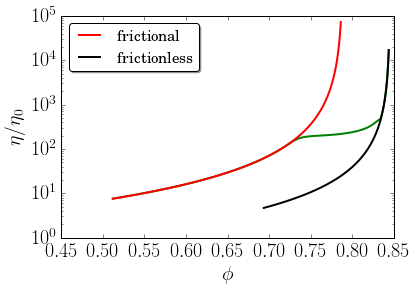

In [18]:
plot_eta()

In [19]:
from ipywidgets import interactive
interactive_plot = interactive(plot_eta, D=(1., 10., 1), J0=(0.0001, 0.001, 0.0003), a=(-2, 2, 0.5) )
interactive_plot.children[0].description=r'$D$'
interactive_plot.children[1].description=r'$J_0$'
interactive_plot.children[2].description=r'$\alpha$'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='$D$', max=10.0, min=1.0, step=1.0), FloatSlider(value=0.001, description='$J_0$', max=0.001, min=0.0001, step=0.0003), FloatSlider(value=2.0, description='$\\alpha$', max=2.0, min=-2.0, step=0.5), Output()), _dom_classes=('widget-interact',))

This is the end of my notebook. Thanks for reading!
&#128515;